In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Qn1>>Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic
Regression, and prints the model accuracy

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [16]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
df["target"] = iris.target

In [20]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [21]:
X = df.drop('target',axis=1)
y = df.target

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
print('Model Accuracy: ', accuracy_score(y_test, y_pred))

Model Accuracy:  0.9666666666666667


Qn2>>Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')
and print the model accuracy.


In [25]:
from sklearn.linear_model import LogisticRegression
l1_model = LogisticRegression(penalty='l1', solver='liblinear')

In [26]:
l1_model.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [27]:
y_l1_pred = l1_model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print("L1 model accuracy: ", accuracy_score(y_test, y_l1_pred))


L1 model accuracy:  0.9333333333333333


Qn3>>Write a Python program to train Logistic Regression with L2 regularization (Ridge) using
LogisticRegression(penalty='l2'). Print model accuracy and coefficients.

In [29]:
from sklearn.linear_model import LogisticRegression
l2_model = LogisticRegression(penalty='l2', solver='liblinear')
l2_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [30]:
y_l2_pred = l2_model.predict(X_test)

In [31]:
print("L2 model accuracy: ", accuracy_score(y_test, y_l2_pred))

L2 model accuracy:  0.8333333333333334


In [32]:
l2_model.coef_

array([[ 0.40813877,  1.37849983, -2.16246497, -0.95999546],
       [ 0.64158363, -1.73276184,  0.3163221 , -1.15005376],
       [-1.76557879, -1.11999414,  2.38091665,  2.22751309]])

Qn4>>Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').


In [33]:
elastic_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
elastic_model.fit(X_train,y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [34]:
elastic_y_pred = elastic_model.predict(X_test)

In [35]:
print('Elastic Model accuracy: ', accuracy_score(y_test, elastic_y_pred))

Elastic Model accuracy:  0.9666666666666667


Qn5>>Write a Python program to train a Logistic Regression model for multiclass classification using
multi_class='ovr'.

In [36]:
# 5. Train Logistic Regression for Multiclass Classification
multi_model = LogisticRegression(multi_class='ovr')
multi_model.fit(X_train, y_train)
multi_ypred = multi_model.predict(X_test)
print("Multiclass Model Accuracy:", accuracy_score(y_test, multi_ypred))

Multiclass Model Accuracy: 0.8666666666666667


Qn6>>Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
Regression. Print the best parameters and accuracy.

In [37]:
param_grid = {
    'C': [0.1,1, 2, 10, 15, 100],
    'penalty': ['l1', 'l2', 'elasticnet']
}

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid=param_grid, cv=5, verbose=3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .................C=0.1, penalty=l1;, score=0.667 total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l1;, score=0.667 total time=   0.0s
[CV 3/5] END .................C=0.1, penalty=l1;, score=0.708 total time=   0.0s
[CV 4/5] END .................C=0.1, penalty=l1;, score=0.708 total time=   0.0s
[CV 5/5] END .................C=0.1, penalty=l1;, score=0.750 total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.667 total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.750 total time=   0.0s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.708 total time=   0.0s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.750 total time=   0.0s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.750 total time=   0.0s
[CV 1/5] END ...........C=0.1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END ...........C=0.1, penalty=elasticne

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1, 2, 10, 15, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=3)

In [40]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 2, 'penalty': 'l2'}
Best Accuracy: 0.9583333333333334


Qn7>>Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the
average accuracy.

In [41]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [42]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
kfold_model = LogisticRegression()
kfold_scores = cross_val_score(kfold_model, X, y, cv=skf)
print("Stratified K-Fold Accuracy:", np.mean(kfold_scores))

Stratified K-Fold Accuracy: 0.9600000000000002


Qn8>>Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its
accuracy.

In [43]:
def load_and_train(file):
    data = pd.read_csv(file)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    csv_model = LogisticRegression()
    csv_model.fit(X_train, y_train)
    y_pred_csv = csv_model.predict(X_test)
    print("CSV Model Accuracy:", accuracy_score(y_test, y_pred_csv))

load_and_train(r"C:\Users\amank\Desktop\Data Science\Practice\diabetes.csv")

CSV Model Accuracy: 0.7467532467532467


Qn9>>Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
Logistic Regression. Print the best parameters and accuracy.

In [44]:
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1, 5, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [45]:
from sklearn.model_selection import  RandomizedSearchCV
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=parameters, cv=5, n_iter=5, random_state=1)
random_search.fit(X_train,y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 10}
Best Accuracy: 0.975


Qn10>>Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

In [46]:
ovo_model = LogisticRegression(multi_class='ovr')
ovo_model.fit(X_train, y_train)
ovo_pred = ovo_model.predict(X_test)
print("OvO Model Accuracy:", accuracy_score(y_test, ovo_pred))

OvO Model Accuracy: 0.8666666666666667


Qn11>>Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
classification.

In [47]:
from sklearn.metrics import confusion_matrix

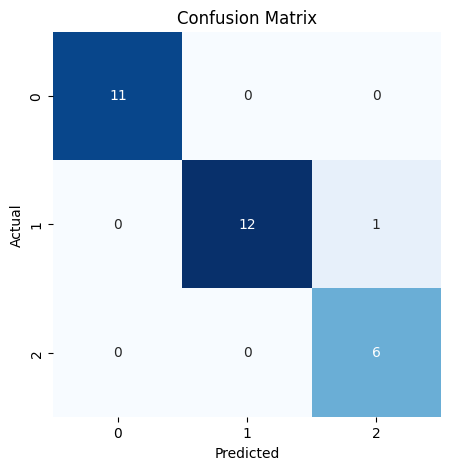

In [48]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Qn12>>Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,
Recall, and F1-Score

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Qn13>>Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
improve model performance

In [50]:
imbalanced_model = LogisticRegression(class_weight='balanced')
imbalanced_model.fit(X_train, y_train)
imbalanced_pred = imbalanced_model.predict(X_test)
print("Imbalanced Model Accuracy:", accuracy_score(y_test, imbalanced_pred))

Imbalanced Model Accuracy: 0.9666666666666667


Qn14>>Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and
evaluate performance

In [51]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
# Drop irrelevant cols
df.drop(['Cabin', 'Ticket', 'Name'], inplace=True, axis=1)

In [56]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [57]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [58]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [59]:
#  Encode categorical data (Embarked, Sex)               
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [60]:
X = df.drop('Survived', axis=1)
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [61]:
# Without scaling
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [62]:
y_pred = model.predict(X_test)

In [63]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7541899441340782
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       106
           1       0.76      0.58      0.66        73

    accuracy                           0.75       179
   macro avg       0.76      0.73      0.73       179
weighted avg       0.76      0.75      0.75       179



Qn15>>Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
model. Evaluate its accuracy and compare results with and without scaling.

In [64]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
model_scaled = LogisticRegression()
model_scaled.fit(X_train, y_train)
y_pred_scaled = model_scaled.predict(X_test)

In [66]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

Accuracy: 0.7541899441340782
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       106
           1       0.76      0.58      0.66        73

    accuracy                           0.75       179
   macro avg       0.76      0.73      0.73       179
weighted avg       0.76      0.75      0.75       179



Qn16>>Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.

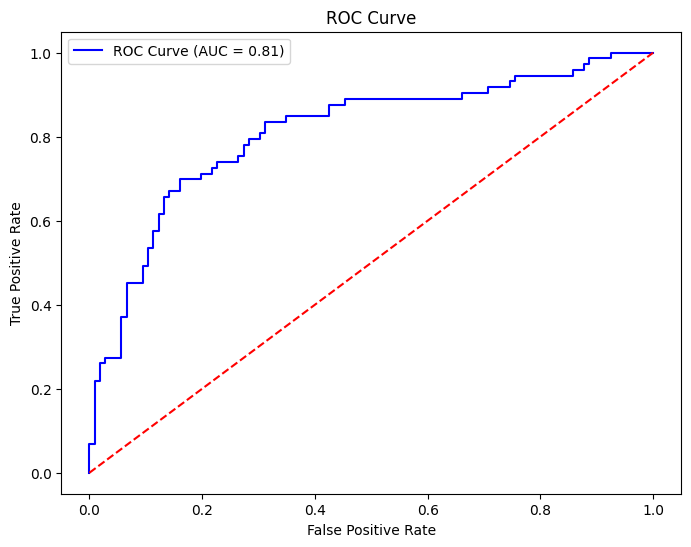

AUC Score: 0.81


In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1 (Survived)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random model reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"AUC Score: {auc_score:.2f}")


Qn17>>Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate
accuracy


In [68]:
from sklearn.metrics import accuracy_score
model_custom_c = LogisticRegression(C=0.5)
model_custom_c.fit(X_train, y_train)


y_pred_custom_c = model_custom_c.predict(X_test)


accuracy_custom_c = accuracy_score(y_test, y_pred_custom_c)


print(f"Accuracy with C=0.5: {accuracy_custom_c:.2f}")


Accuracy with C=0.5: 0.77


Qn18>>Write a Python program to train Logistic Regression and identify important features based on model
coefficients

In [69]:
model_coef = LogisticRegression()
model_coef.fit(X_train, y_train)

LogisticRegression()

In [70]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_coef.coef_[0]})
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()

In [71]:
feature_importance

,Feature,Coefficient,Absolute Coefficient
0,PassengerId,0.001272,0.001272
1,Pclass,-0.333295,0.333295
2,Sex,-2.211349,2.211349
3,Age,-0.002967,0.002967
4,SibSp,-0.322206,0.322206
5,Parch,0.019894,0.019894
6,Fare,0.011078,0.011078
7,Embarked_Q,0.212670,0.212670
8,Embarked_S,-0.032487,0.032487


In [72]:
# sort by importance
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)


In [73]:
print("Feature Importance based on Logistic Regression Coefficients:\n")
print(feature_importance)

Feature Importance based on Logistic Regression Coefficients:

       Feature  Coefficient  Absolute Coefficient
2          Sex    -2.211349              2.211349
1       Pclass    -0.333295              0.333295
4        SibSp    -0.322206              0.322206
7   Embarked_Q     0.212670              0.212670
8   Embarked_S    -0.032487              0.032487
5        Parch     0.019894              0.019894
6         Fare     0.011078              0.011078
3          Age    -0.002967              0.002967
0  PassengerId     0.001272              0.001272


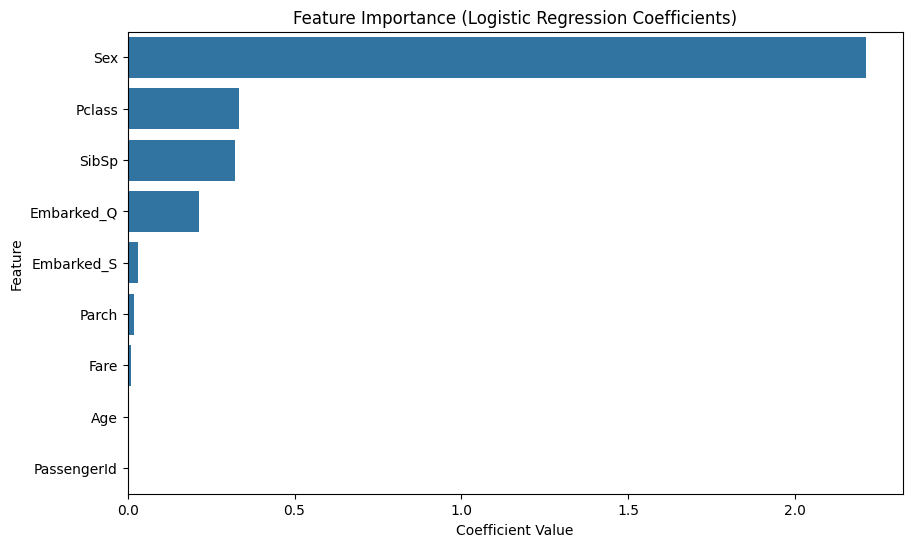

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Qn19>>Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa
Score.

In [75]:
from sklearn.metrics import cohen_kappa_score

model_kappa = LogisticRegression()
model_kappa.fit(X_train, y_train)

y_pred_kappa = model_kappa.predict(X_test)

kappa_score = cohen_kappa_score(y_test, y_pred_kappa)

print(f"Cohen’s Kappa Score: {kappa_score:.2f}")


Cohen’s Kappa Score: 0.47


Qn20>>Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary
classificatio

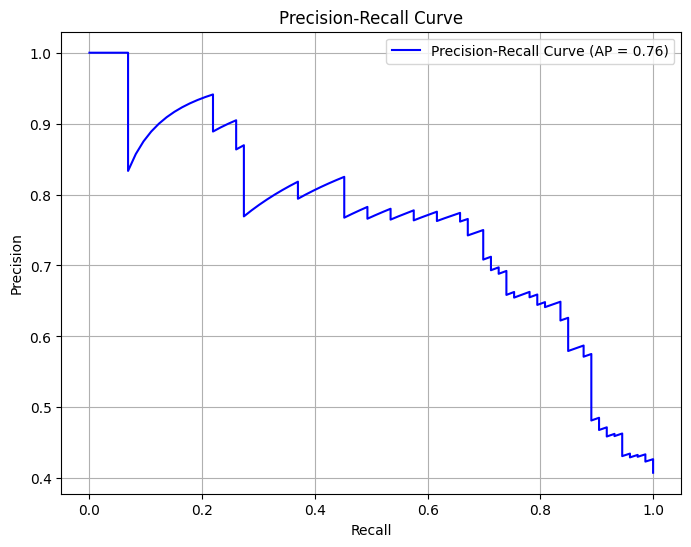

Average Precision Score: 0.76


In [76]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Predict probabilities
y_prob_pr = model.predict_proba(X_test)[:, 1] 

# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_pr)

# Compute Average Precision Score
avg_precision = average_precision_score(y_test, y_prob_pr)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

print(f"Average Precision Score: {avg_precision:.2f}")


Qn21>>Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare
their accuracy

In [189]:
solver = ['liblinear', 'saga', 'lbfgs']
accuracy_scores = {}

In [190]:

for solver in solver:
    model_solver = LogisticRegression(solver=solver, max_iter=500)
    model_solver.fit(X_train, y_train)

    y_pred_solver = model_solver.predict(X_test)
    accuracy_solver = accuracy_score(y_test, y_pred_solver)

    accuracy_scores[solver] = accuracy_solver
    print(f"Accuracy with {solver}: {accuracy_solver:.2f}")


Accuracy with liblinear: 0.78
Accuracy with saga: 0.65
Accuracy with lbfgs: 0.78


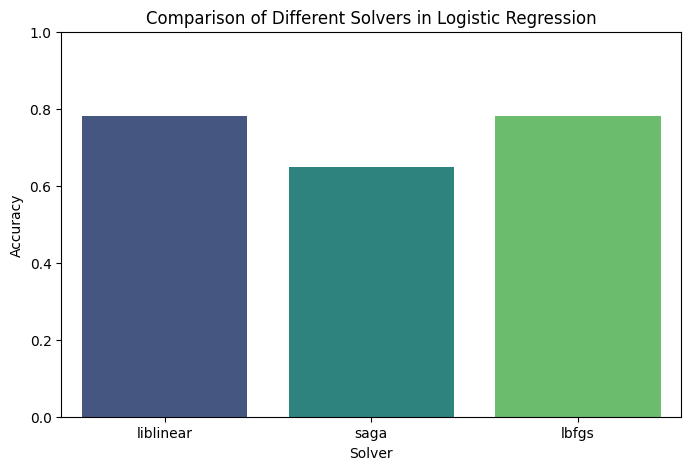

In [195]:
# Plot the accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.xlabel("Solver")
plt.ylabel("Accuracy")
plt.title("Comparison of Different Solvers in Logistic Regression")
plt.ylim(0, 1)
plt.show()

Qn22>>Write a Python program to train Logistic Regression and evaluate its performance using Matthews
Correlation Coefficient (MCC).

In [197]:
from sklearn.metrics import matthews_corrcoef

# Train Logistic Regression model
model_mcc = LogisticRegression()
model_mcc.fit(X_train, y_train)

# Predictions
y_pred_mcc = model_mcc.predict(X_test)

# Compute MCC Score
mcc_score = matthews_corrcoef(y_test, y_pred_mcc)

print(f"Matthews Correlation Coefficient (MCC): {mcc_score:.2f}")


Matthews Correlation Coefficient (MCC): 0.48


Qn23>> Write a Python program to train Logistic Regression on both raw and standardized data. Compare their
accuracy to see the impact of feature scaling

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [199]:
df1 = pd.read_csv('Titanic-Dataset.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
X = df.drop(columns=['Survived'])  # Assuming 'Survived' is the target column
y = df['Survived']

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [202]:
model_raw = LogisticRegression()
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

In [203]:
# Apply Standardization (Feature Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [204]:
# Train Logistic Regression on Standardized Data
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

In [205]:
print(f"Accuracy without Scaling: {accuracy_raw:.2f}")
print(f"Accuracy with Standardization: {accuracy_scaled:.2f}")

Accuracy without Scaling: 0.75
Accuracy with Standardization: 0.79


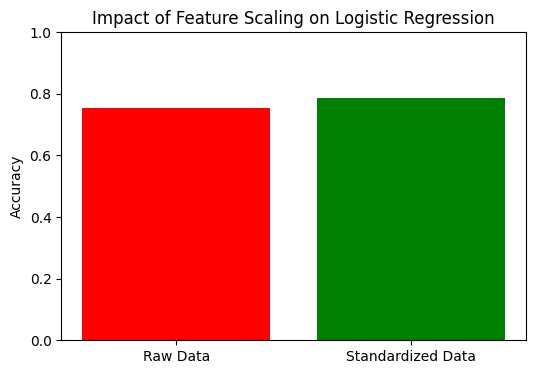

In [212]:
plt.figure(figsize=(6, 4))
plt.bar(x=["Raw Data", "Standardized Data"], height=[accuracy_raw, accuracy_scaled], color=['red', 'green'])
plt.ylabel("Accuracy")
plt.title("Impact of Feature Scaling on Logistic Regression")
plt.ylim(0, 1)
plt.show()

Qn24>>Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using
cross-validation

In [213]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]}

In [214]:

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             scoring='accuracy')

In [216]:
best_C = grid_search.best_params_['C']
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=0.01)

In [217]:
y_pred_best = best_model.predict(X_test_scaled)

In [218]:
best_accuracy = accuracy_score(y_test, y_pred_best)


In [219]:
print(f"Best Regularization Strength (C): {best_C}")
print(f"Best Model Accuracy: {best_accuracy:.2f}")

Best Regularization Strength (C): 0.01
Best Model Accuracy: 0.77


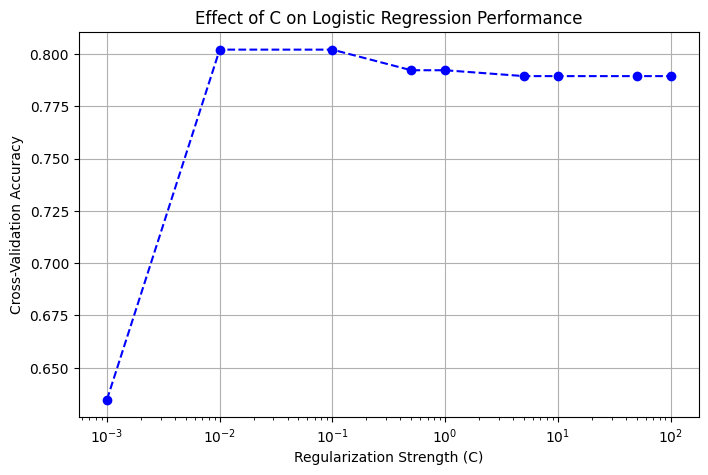

In [220]:
# Plot C values vs Accuracy
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 5))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], marker='o', linestyle='dashed', color='b')
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Cross-Validation Accuracy")
plt.xscale('log')
plt.title("Effect of C on Logistic Regression Performance")
plt.grid()
plt.show()


Qn25>>Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to
make predictions.

In [221]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [222]:
import joblib
joblib.dump(model, "model_qn25.pkl")
print('Model save successfully')

Model save successfully


In [223]:
loaded_model = joblib.load("model_qn25.pkl")
print('Model load successfully')

Model load successfully


In [224]:
y_pred_loaded = loaded_model.predict(X_test_scaled)

In [225]:

accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Accuracy of Loaded Model: {accuracy_loaded:.2f}")

Accuracy of Loaded Model: 0.79
